**Семинар 2**

In [1]:
# самая простая, но самая близкая к матлабу библиотека для графиков - matplotlib.pyplot (модуль pyplot из библиотеки matplotlib)
import matplotlib.pyplot as plt
from random import random

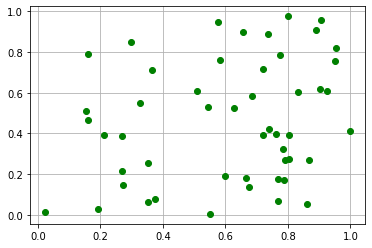

In [3]:
x = [random() for i in range(50)]
y = [random() for i in range(50)]
plt.plot(x,y, 'og')
plt.grid()

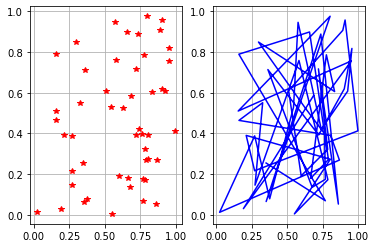

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, '*r')
ax1.grid()

ax2.plot(x, y, 'b')
ax2.grid()

# fig.show() # при написании gui нужна отдельная команда ддя показа

In [6]:
# в юпитер ноутбуке есть "магические" функции. все они начинаются со знака процент "%"
# самые частоиспользуемые:
# %matplotlib inline # - включает режим, когда графики рисуются в окне ноутбука
# %matplotlib qt   # - включает режим, когда графики рисуются в отдельном окне
%matplotlib qt


In [8]:
# построим графики еще раз
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, y, '*r')
ax1.grid()

ax2.plot(x, y, 'b')
ax2.grid()


In [9]:
# вернем обратно
%matplotlib inline

In [12]:
import numpy as np

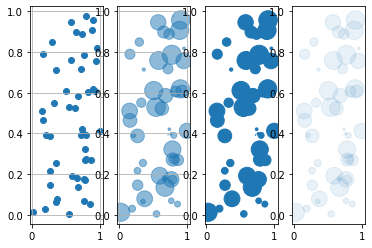

In [16]:
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.scatter(x,y) # Точечная диаграмма зависимости y от x с разным размером маркера и/или цветом.
ax1.grid()

# just for fun
area = (20 * np.random.rand(len(x)))**2 # зададим случайную область вокруг точек их х
ax2.scatter(x, y, s = area, alpha=0.5) # параметл alpha задает прозрачность графика
ax2.grid()
# fig2.show()

ax3.scatter(x, y, s = area, alpha=1)
ax4.scatter(x, y, s = area, alpha=0.1) # если сделать alpha = 0, то ничего не увидим ¯\_(ツ)_/¯  

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).

Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
https://www.kaggle.com/mlg-ulb/creditcardfraud

Credit Card Fraud Detection
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.


In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


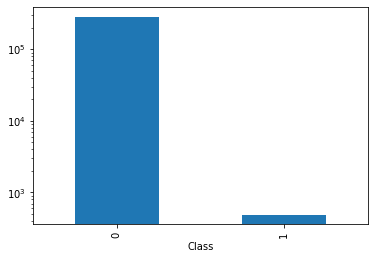

In [19]:
data.value_counts(data.Class).plot(kind='bar')
plt.yscale(value='log')

На графике построим две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). 

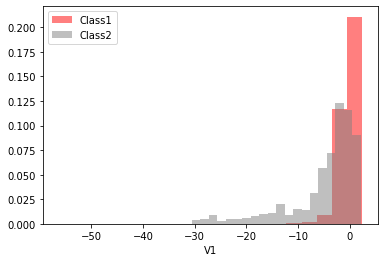

In [21]:
fig = plt.figure()
ax = plt.axes()
d1 = data.loc[data.Class == 0].V1
d2 = data.loc[data.Class == 1].V1

# значение аргумента density = True, делает так, чтобы по вертикали графика 
# было расположено не число наблюдений, а плотность распределения. 
ax.hist(d1, color='r', alpha=0.5, label='Class1', density=True, bins=20)
ax.hist(d2, color='gray', alpha=0.5, label='Class2', density=True, bins=20)
ax.legend()
_ = ax.set_xlabel('V1')